<a href="https://colab.research.google.com/github/rajshekharsingh66/Capstone_project1/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
csv_file_path = '/content/Global Terrorism Data.csv'

encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(csv_file_path, encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue  # If decoding fails, try the next encoding


In [69]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [70]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [71]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [72]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [74]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [75]:
df.index

RangeIndex(start=0, stop=181691, step=1)

In [76]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [77]:
df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [78]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0





#1.Which region has highest terrorirst attacks?




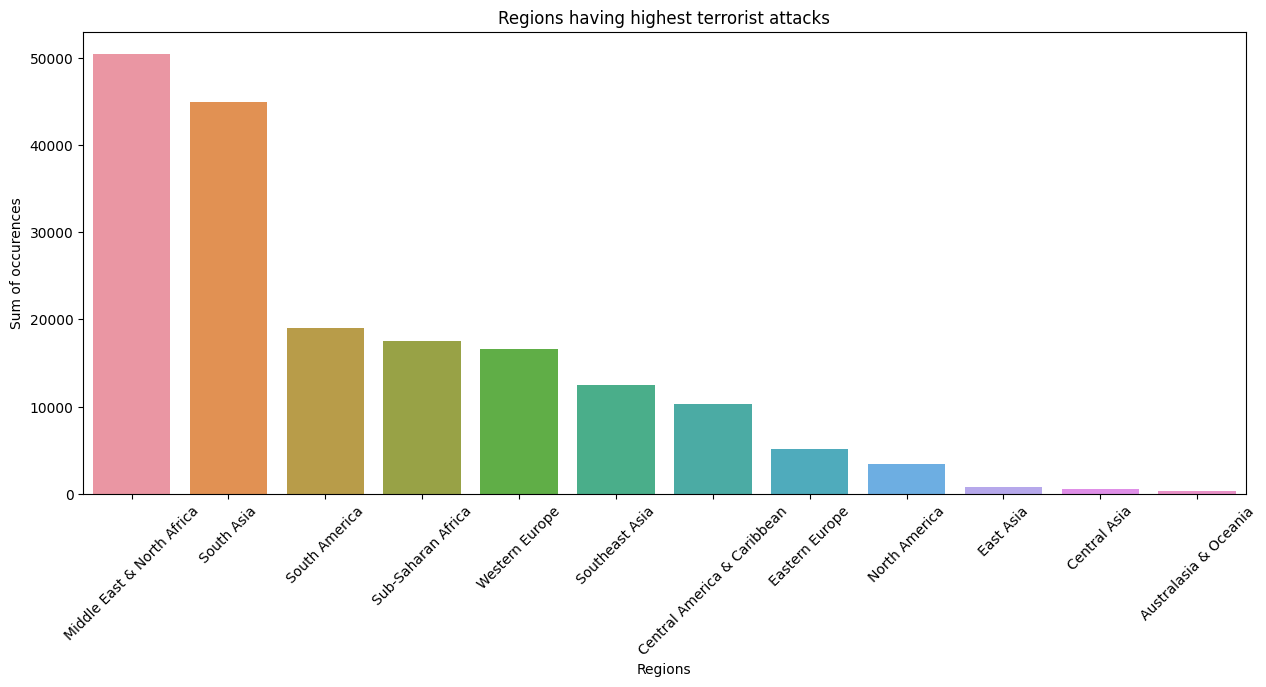

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Assuming 'df' is your DataFrame with a 'Region' column
sns.countplot(x='Region', data=df,order=df['Region'].value_counts().index)

# Add labels and a title
plt.xlabel('Regions')
plt.ylabel('Sum of occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

#2.Which country has highest terrorirst attacks?

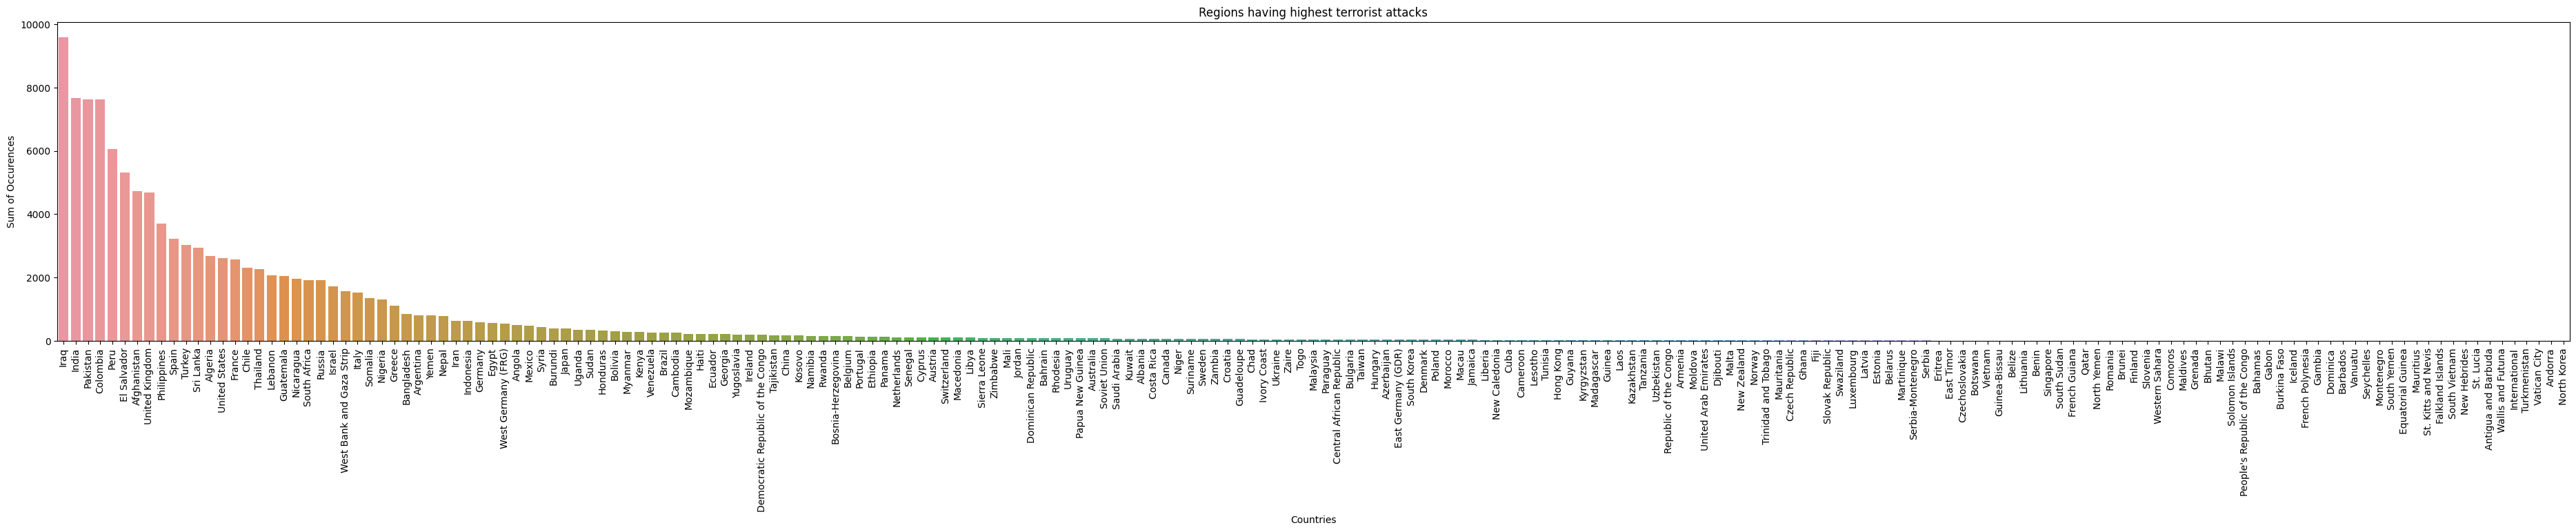

In [ ]:
plt.figure(figsize=(47,6))
sns.countplot(x='Country', data=df , order=df['Country'].value_counts().index)

# Add labels and a title
plt.xlabel('Countries')
plt.ylabel('Sum of Occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

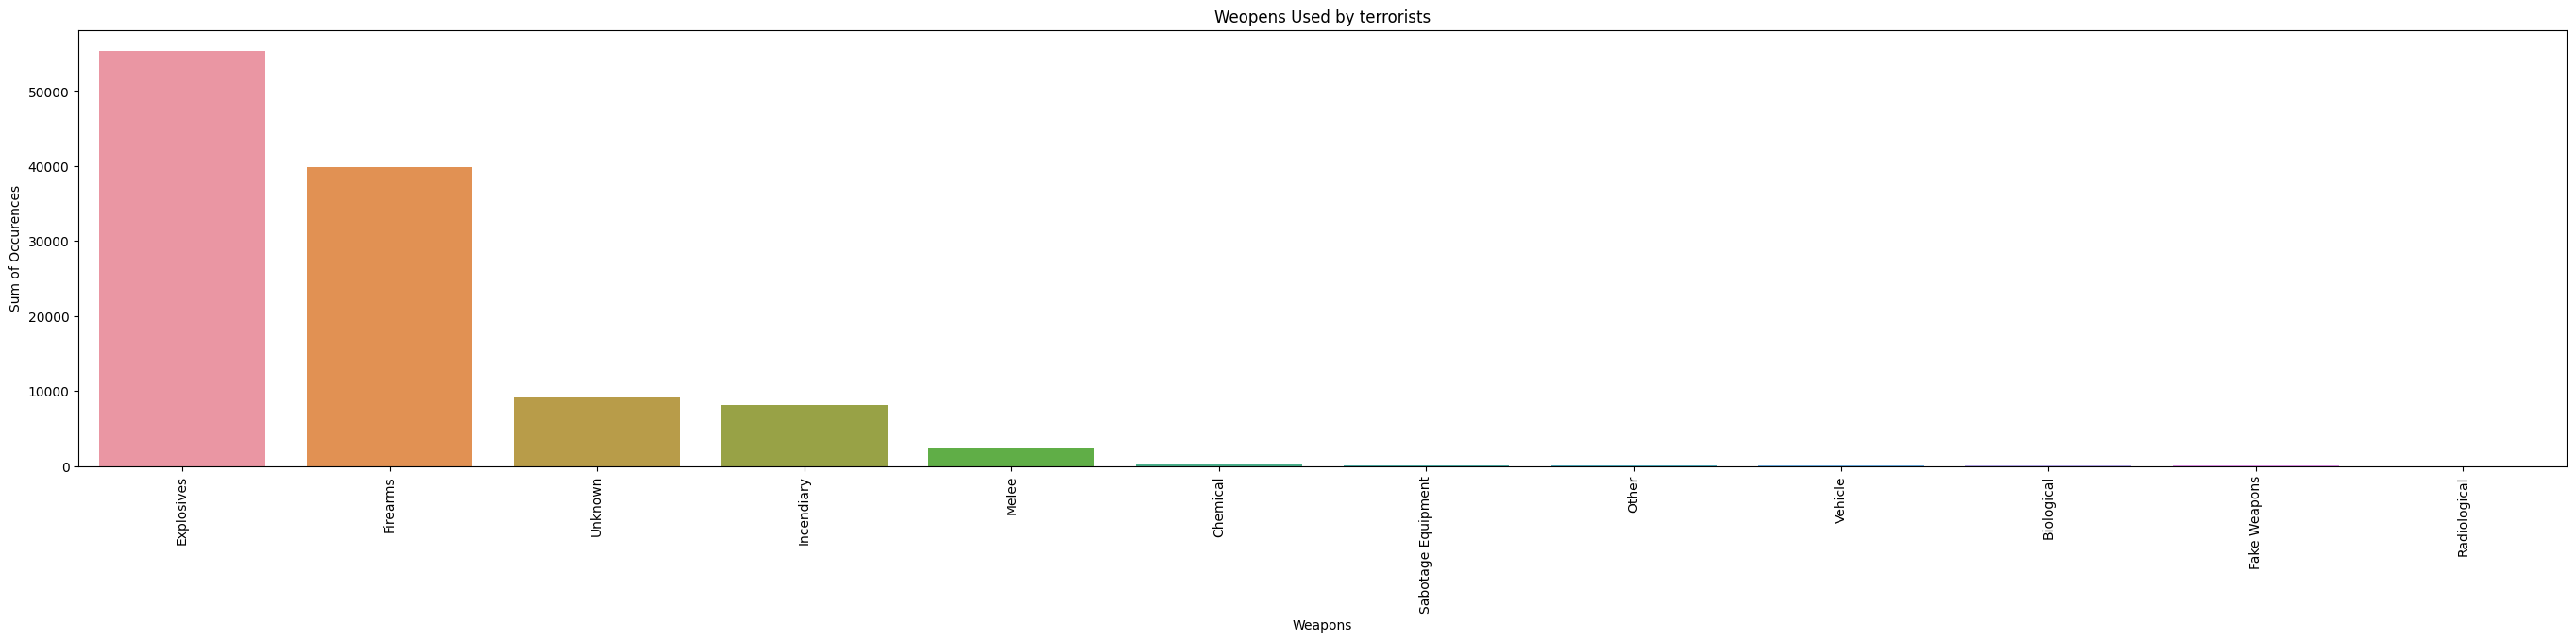

In [ ]:
plt.figure(figsize=(34,6))
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
sns.countplot(x='Weapon_type',data=df,order=df['Weapon_type'].value_counts().index)
plt.xlabel('Weapons')
plt.ylabel('Sum of Occurences')
plt.title('Weopens Used by terrorists')
plt.xticks(rotation=90)
plt.show()

#4. Motive behind activities related to terrorism

In [ ]:
df1 = df[df['Motive'].notna()]

In [ ]:
df1

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0
11,1970,1,6,United States,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0.0
14,1970,1,9,United States,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115264,2013,3,19,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,1.0,Parking Lot,03/19/2013: Two hand grenades detonated in the...,Devrimici Halk Kurtulus Cephesi (DHKP/C),Government (General),Explosives,Devrimici Halk Kurtulus Cephesi (DHKP/C) claim...,1.0
115290,2013,3,19,Philippines,Southeast Asia,Mawab,7.500000,125.933333,Armed Assault,0.0,0.0,Convoy,03/19/2013: Assailants opened fire on a police...,New People's Army (NPA),Police,Firearms,"The specific motive is unknown; however, Senio...",0.0
115298,2013,3,18,Philippines,Southeast Asia,Nabangig,12.102778,123.941389,Armed Assault,1.0,0.0,Councilor: Ervin Niez,03/18/2013: Assailants opened fire on Ervin Ni...,Unknown,Government (General),Firearms,"The specific motive is unknown; however, Senio...",1.0
115303,2013,3,19,India,South Asia,Sopore,34.288891,74.463715,Armed Assault,1.0,0.0,Youth: Suhail Ahmed Sofi,03/19/2013: Assailants opened fire on a civili...,Lashkar-e-Taiba (LeT),Private Citizens & Property,Firearms,"The specific motive is unknown; however, sourc...",1.0


#5. Number of terrorist activities occured in region with respect to year

In [ ]:
fig_bar = px.histogram(df, x="Region", y="Killed",
                 animation_frame="Year",
                 color_discrete_sequence=px.colors.qualitative.T10)
fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=45,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3045',
                        title_font=dict(size=25, color='#a6a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )
fig_bar.show()

## 6. Number of Terrorist activities vs Year

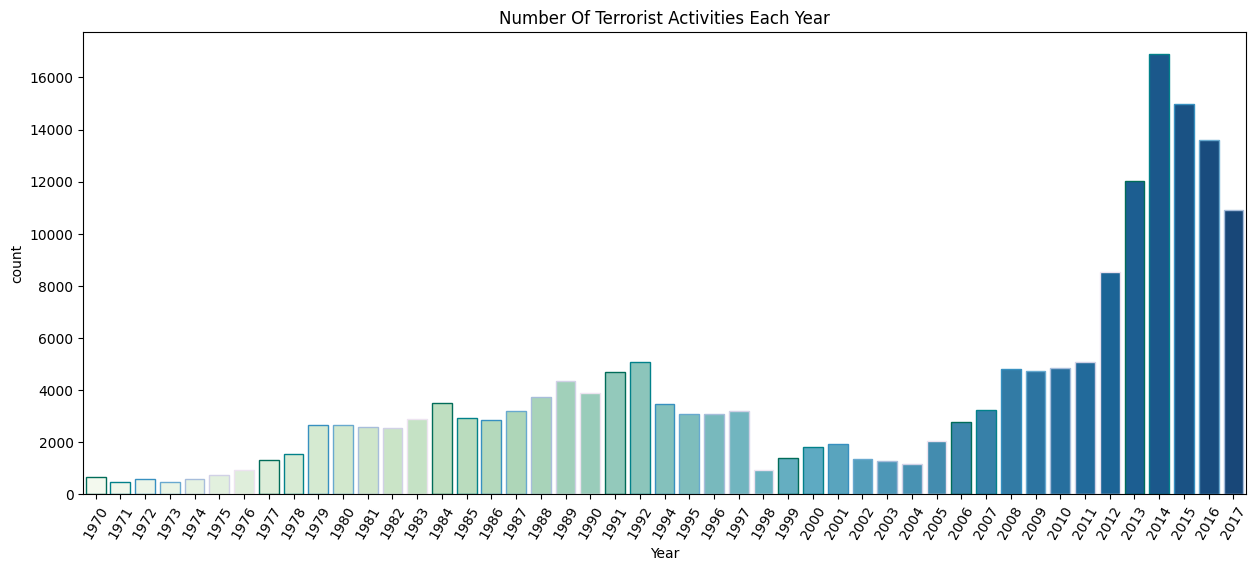

In [84]:
# Assuming 'df' is your DataFrame with a 'Year' column
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='GnBu', edgecolor=sns.color_palette('PuBuGn_r', 7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


In [ ]:
df['Killed'].sum()

248509.0